<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="https://raw.githubusercontent.com/jupyter/nature-demo/master/images/jupyter-logo.png" width="100px" style="display: inline-block; margin-top: 10px;">
<a href="https://mybinder.org"><img src="https://mybinder.org/static/logo.svg" width="120px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

# ODEs and Fourier Transform with SciPy

This notebook is a part of [Lectures on scientific computing with Python](http://github.com/jrjohansson/scientific-python-lectures) by [J.R. Johansson](http://jrjohansson.github.io). 

<div class="alert alert-info" role="alert" style="margin: 10px">
<p>This notebook is running on a server that was **launched just for you**. Your changes will be reset once server restarts due to inactivity, so don't rely on it for anything you want to last.
</p>
</div>

Your server is hosted thanks to [binder](https://mybinder.org), service that allows you to create custom computing environments based on GitHub repositories.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ["retina"]
from IPython.display import Image
from scipy import *

## Ordinary differential equations (ODEs)

SciPy provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control.

Here we will use the `odeint` functions. For more information about the class `ode`, try `help(ode)`. It does pretty much the same thing as `odeint`, but in an object-oriented fashion.

To use `odeint`, first import it from the `scipy.integrate` module

In [2]:
from scipy.integrate import odeint, ode

A system of ODEs are usually formulated on standard form before it is attacked numerically. The standard form is:

$y' = f(y, t)$

where 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and an initial condition, $y(0)$.

Note that higher-order ODEs can always be written in this form by introducing new variables for the intermediate derivatives.

Once we have defined the Python function `f` and array `y_0` (that is $f$ and $y(0)$ in the mathematical formulation), we can use the `odeint` function as:

    y_t = odeint(f, y_0, t)

where `t` is and array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time. 

We will see how we can implement `f` and `y_0` in Python code in the examples below.

### Example: double pendulum

Let's consider a physical example: The double compound pendulum, described in some detail here: http://en.wikipedia.org/wiki/Double_pendulum

In [3]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

The equations of motion of the pendulum are given on the wiki page:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

To make the Python code simpler to follow, let's introduce new variable names and the vector notation: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [4]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [5]:
# choose an initial state
x0 = [pi/4, pi/2, 0, 0]

In [6]:
# time coodinate to solve the ODE for: from 0 to 10 seconds
t = linspace(0, 10, 250)

In [7]:
# solve the ODE problem
x = odeint(dx, x0, t)

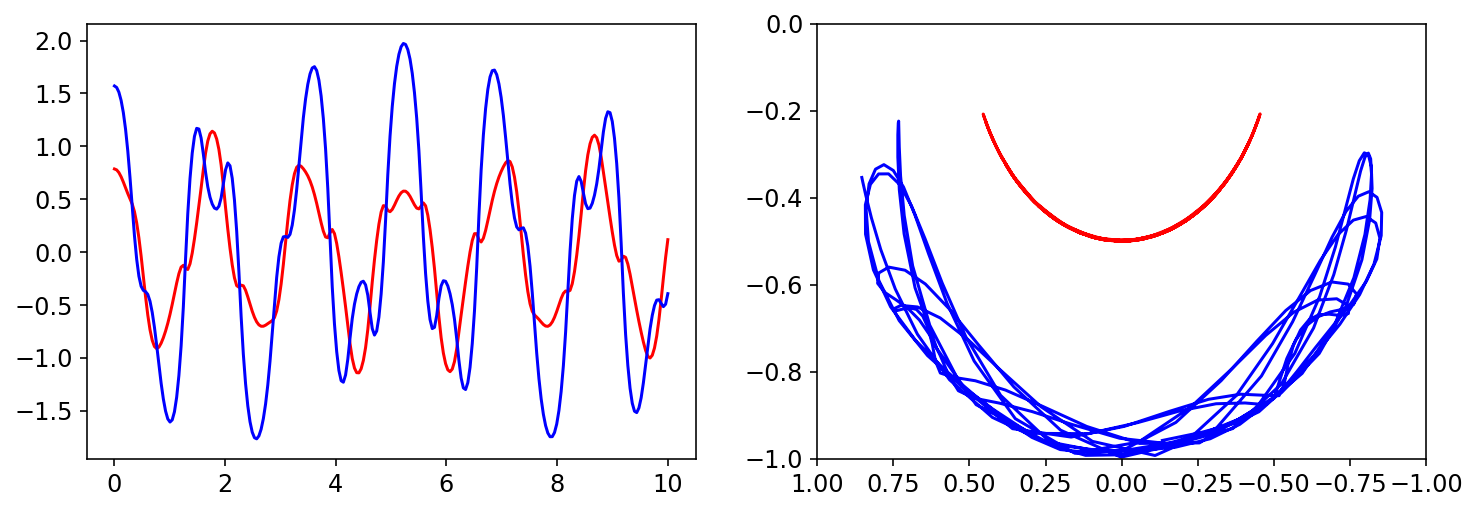

In [8]:
# Restoring font size.
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")


x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

### Example: Damped harmonic oscillator

ODE problems are important in computational physics, so we will look at one more example: the damped harmonic oscillation. This problem is well described on the wiki page: http://en.wikipedia.org/wiki/Damping

The equation of motion for the damped oscillator is:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio. To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In the implementation of this example we will add extra arguments to the RHS function for the ODE, rather than using global variables as we did in the previous example. As a consequence of the extra arguments to the RHS, we need to pass an keyword argument `args` to the `odeint` function:

In [9]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [10]:
# initial state: 
y0 = [1.0, 0.0]

In [11]:
# time coodinate to solve the ODE for
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [12]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

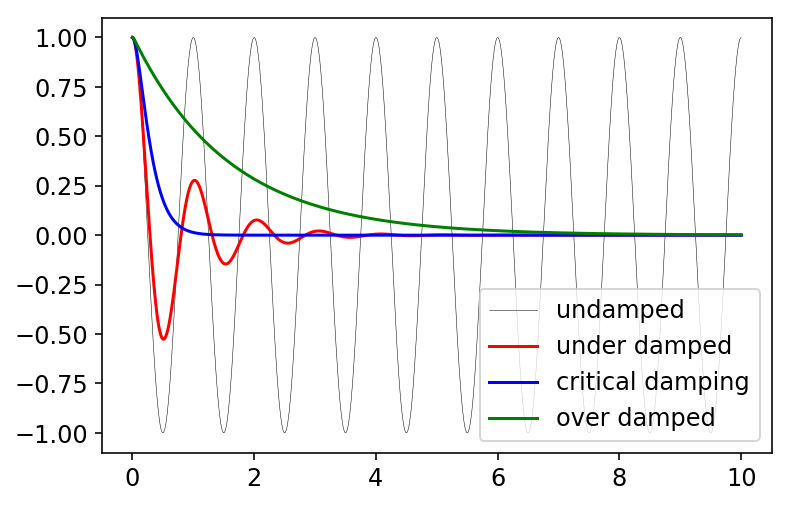

In [13]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

## Fourier transform

Fourier transforms are one of the universal tools in computational physics, which appear over and over again in different contexts. SciPy provides functions for accessing the classic [FFTPACK](http://www.netlib.org/fftpack/) library from NetLib, which is an efficient and well tested FFT library written in FORTRAN. The SciPy API has a few additional convenience functions, but overall the API is closely related to the original FORTRAN library.

To use the `fftpack` module in a python program, include it using:

In [14]:
from numpy.fft import fftfreq
from scipy.fftpack import *

To demonstrate how to do a fast Fourier transform with SciPy, let's look at the FFT of the solution to the damped oscillator from the previous section:

In [15]:
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

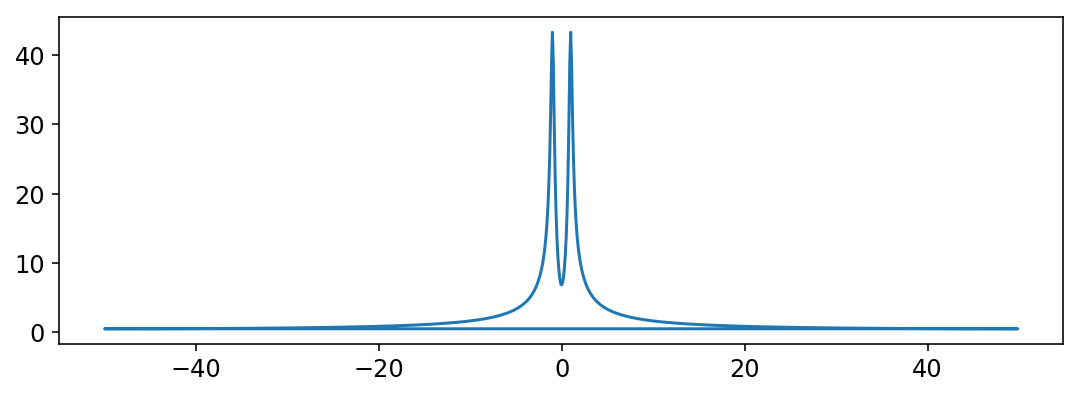

In [16]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

Since the signal is real, the spectrum is symmetric. We therefore only need to plot the part that corresponds to the postive frequencies. To extract that part of the `w` and `F` we can use some of the indexing tricks for NumPy arrays that we saw in Lecture 2:

In [17]:
indices = where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

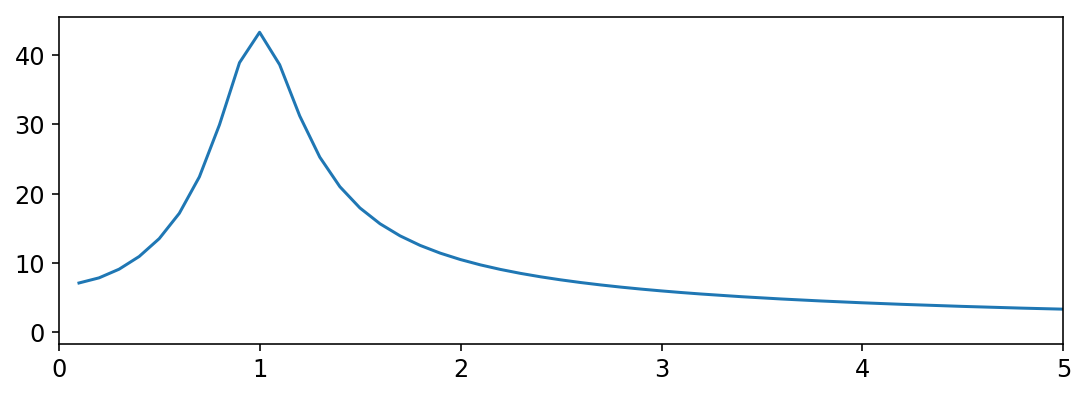

In [18]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

As expected, we now see a peak in the spectrum that is centered around 1, which is the frequency we used in the damped oscillator example.

## Further reading

* Check out more introductory notebooks in **Juno**!
* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 

## Versions

In [19]:
%reload_ext version_information

%version_information numpy, matplotlib, scipy

Software versions
Python 3.6.1 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 6.2.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.12.1
matplotlib 2.0.2
scipy 0.19.0
Mon Apr 30 20:05:34 2018 BST